<a href="https://colab.research.google.com/github/OkktaDan/CCADMACL_EXERCISES_COM231ML/blob/main/Exercise-1/Exercise-1B/Octaviano_exercise1B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXERCISE 1B

You are working as a junior data scientist for a retail company that operates a large shopping mall. The marketing team wants to better understand customer segments so they can create more targeted promotions, loyalty programs, and personalized marketing strategies.

Your task is to analyze customer behavior using the Mall Customers Dataset, which includes information such as age, gender, annual income, and spending score. By applying K-Means clustering, you will identify natural customer groups based on their purchasing patterns.

<img src="https://cdn.theatlantic.com/media/mt/food/main%20Dmitrijs%20Dmitrijevs%20shutterstock_21143044.jpg"/>


In [175]:
import pandas as pd
import plotly.express as px
from sklearn import datasets,metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [157]:
dataseturl = 'https://github.com/robitussin/CCADMACL_EXERCISES/blob/d10902a17b0a0ccfb79fe155ddeb19474d38da71/exercise1b/mallcustomers.csv?raw=true'


## 1. Load the Dataset


Load the Mall Customers dataset (upload or load from a URL).


In [158]:
df = pd.read_csv(dataseturl)

Display the first 5 rows using `head()`. `(5 pts)`

In [159]:
df.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2. Explore the Dataset

Print dataset shape. `(5 pts)`


In [160]:
print(df.shape)

(200, 5)


Show summary statistics using `describe()`. `(5 pts)`

In [161]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Check for missing values. `(5 pts)`

In [162]:
print(df.isnull().sum())

CustomerID       0
Genre            0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


## 3. Select Features for Clustering

Use only the following columns:

- Annual Income (k$)
- Spending Score (1-100)


Create a new DataFrame with only these two columns. `(5 pts)`

In [163]:
new_df = df[['AnnualIncome','SpendingScore']]

Display the first 10 rows. `(5 pts)`

In [164]:
new_df.head(10)

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


## 4. Visualize Data `(10 pts)`

- Create a scatter plot of Annual Income vs Spending Score.
- Label axes properly.
- Add a title.

Text(0.5, 1.0, 'Customer Data')

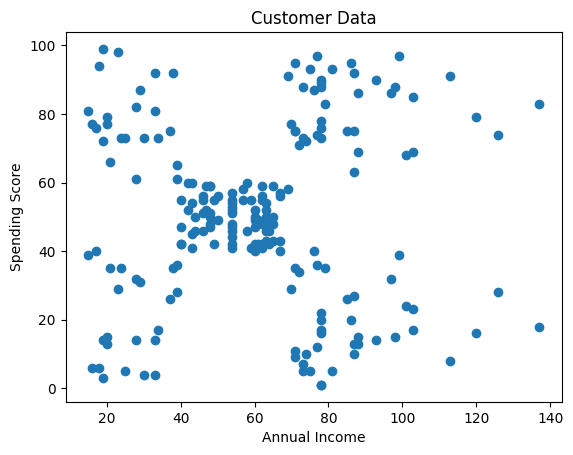

In [174]:
new_df_X = new_df[['AnnualIncome']]
new_df_Y = new_df[['SpendingScore']]
plt.scatter(new_df_X,new_df_Y)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Data')

## 5. Determine Optimal Number of Clusters `(10 pts)`

- Run K-Means for K = 1 to 10.
- Store WCSS (within-cluster sum of squares).
- Plot the elbow curve.

For cluster = 1, SSE/WCSS is 269981.28000000014
For cluster = 2, SSE/WCSS is 181363.59595959607
For cluster = 3, SSE/WCSS is 106348.37306211119
For cluster = 4, SSE/WCSS is 73679.78903948837
For cluster = 5, SSE/WCSS is 44448.45544793369
For cluster = 6, SSE/WCSS is 37265.86520484345
For cluster = 7, SSE/WCSS is 30259.657207285458
For cluster = 8, SSE/WCSS is 25050.832307547524
For cluster = 9, SSE/WCSS is 21862.09267218289
For cluster = 10, SSE/WCSS is 19657.783608703947


Text(0, 0.5, 'WCSS')

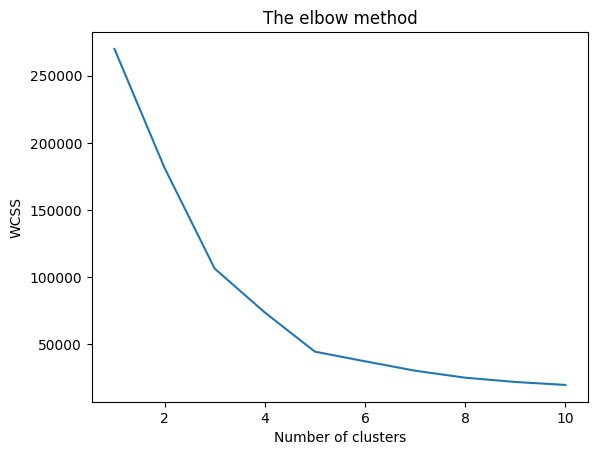

In [166]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init= 10 ,random_state = 0)
    kmeans.fit(new_df)
    wcss.append(kmeans.inertia_)
    print("For cluster = {}, SSE/WCSS is {}".format(i,kmeans.inertia_))

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## 6. Train K-Means with Optimal K `(10 pts)`


- Choose K based on the elbow method.
- Fit the K-Means model.
- Assign cluster labels to the dataset.
- Display first 10 labeled rows.

In [167]:
num_cluster = 5
cluster_means = KMeans(n_clusters = num_cluster)
model_kmeans = cluster_means.fit(new_df)
model_labels = model_kmeans.labels_
print(model_labels)
new_df['cluster'] = model_labels

new_df.head(10)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 4 3 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 1 2 1 4 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 4 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


/tmp/ipython-input-811027213.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cluster'] = model_labels


,AnnualIncome,SpendingScore,cluster
0,15,39,3
1,15,81,0
2,16,6,3
3,16,77,0
4,17,40,3
5,17,76,0
6,18,6,3
7,18,94,0
8,19,3,3
9,19,72,0


## 7. Visualize the Clusters `(10 pts)`

- Create a scatter plot showing the formed clusters.
- Color points by cluster.
- Plot cluster centroids as larger points.

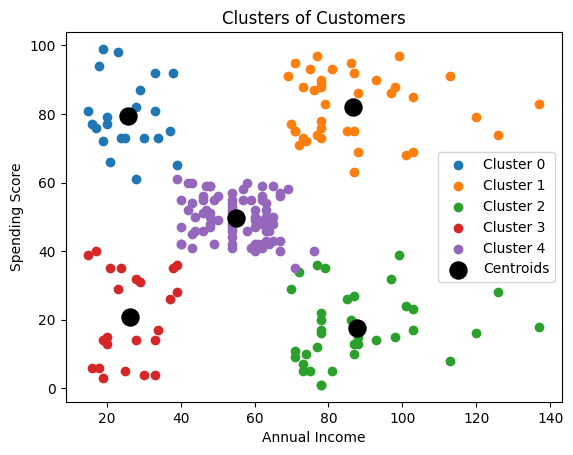

In [168]:
for i in range(num_cluster):
    plt.scatter(new_df[model_labels == i]['AnnualIncome'],
                new_df[model_labels == i]['SpendingScore'],
                label = 'Cluster {}'.format(i))

centroid = cluster_means.cluster_centers_
plt.scatter(centroid[:,0],centroid[:,1],s=150,color='black', label='Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clusters of Customers')
plt.legend()

## 8. Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Which cluster represents high income, low spending users?
- Which cluster represents low income, high spending users?
- Which cluster might represent target customers for promotions?
- What business insights can you derive from the clusters?

**ANSWERS**
- The cluster that represents high income, low spending users is cluster 0.

- The cluster that represents low income, high spending users is cluster 4.

- Cluster 2 is the target customers for promotions
 due to them being high income customers with low spending scores.

- Targetting cluster 2 for ad promotions to increase
their spending score, for more business sales.

## 9. Add Age to the Clustering Model

Create a new 3D K-Means model using features: `(5 pts)`


- Age
- Annual Income
- Spending Score


In [185]:
df_ = df[['Age','AnnualIncome','SpendingScore']]
cluter_means_ = KMeans(n_clusters=num_cluster)
model_kmeans_ = cluter_means_.fit(df_)
model_labels_ = model_kmeans_.labels_
df_['Cluster'] = model_labels_



/tmp/ipython-input-3646629226.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Visualize using a 3D scatter plot. `(5 pts)`

In [191]:
fig = px.scatter_3d(df_, x='AnnualIncome', y='SpendingScore',
                    z='Age', color="Cluster", title="3D visualiization", opacity = 0.7, size="Cluster")
fig.show()

## 10. 3D Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Are there meaningful and distinguishable clusters?
- What business insights can you derive from the clusters in 3D??

 **ANSWERS**

 - Reading the area of each clusters with age, we can assume that clusters 4 and a bit of 2  are older people(retired, elderly, late 50s) mostly spend less, or just the right amount of luxury due to having less income or being retired. While people at cluster 3 aging in their early 40s and below have high spending habits due to them having a job, and starting their life and buying out all the things they want with their income. While we can also assume people at cluter 1 are mostly financially rich.

 - Catering to people within the ages of 20 to 40 is a good business strategy due to them having a more stable income and willing to spend more money on the things they want.

